
# Estadística Inferencial  
**Dataset:** `insurance_claims.csv`
**Objetivo:** Entender la estructura estadística básica de la siniestralidad antes de pasar a inferencia / modelado.



In [3]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Cargar datos
claims = pd.read_csv("insurance_claims.csv")



In [4]:
claims

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,2014-10-17,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,2000-09-06,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,1991-07-16,OH,500/1000,1000,1310.80,0,431289,...,?,87200,17440,8720,61040,Honda,Accord,2006,N,NaN
996,285,41,186934,2014-01-05,IL,100/300,1000,1436.79,0,608177,...,?,108480,18080,18080,72320,Volkswagen,Passat,2015,N,NaN
997,130,34,918516,2003-02-17,OH,250/500,500,1383.49,3000000,442797,...,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N,NaN
998,458,62,533940,2011-11-18,IL,500/1000,2000,1356.92,5000000,441714,...,YES,46980,5220,5220,36540,Audi,A5,1998,N,NaN



Dataset: `insurance_claims` (Mendeley Data)



| # | Tipo de comparación                         | Pregunta práctica                                                                                               | Ejemplo con `insurance_claims.csv`                                                                                   | Prueba estadística                                              | Variables implicadas                                                                                   | Interpretación actuarial                                                                                                      |
|---|---------------------------------------------|------------------------------------------------------------------------------------------------------------------|----------------------------------------------------------------------------------------------------------------------|-----------------------------------------------------------------|---------------------------------------------------------------------------------------------------------|-------------------------------------------------------------------------------------------------------------------------------|
| 1 | 1 grupo vs. valor (t-test 1 muestra)        | ¿El coste medio actual difiere del valor histórico esperado?                                                    | Históricamente el siniestro medio cuesta 55.000 USD. ¿El promedio actual (`total_claim_amount`) sigue siendo ese?    | T-test de una muestra (`stats.ttest_1samp`)                     | `total_claim_amount` vs. valor fijo (55000)                                             | Evalúa si la cartera actual se encareció o abarató frente al promedio técnico.                                               |
| 2 | 2 grupos independientes                     | ¿Dos grupos distintos tienen medias diferentes?                                                                 | ¿Los siniestros marcados como fraude ("Y") cuestan distinto a los no fraude ("N")?                                   | T-test independiente (Welch) (`stats.ttest_ind(equal_var=False)`) | `fraud_reported` y `total_claim_amount`                                                 | Detecta si el fraude implica una severidad económica significativamente mayor.                                              |
| 3 | Mismo grupo (2 veces)                       | ¿El mismo conjunto cambió tras una intervención o revisión?                                                     | Para cada siniestro: comparar reserva inicial vs pago final (si tuviéramos ambas columnas).                          | T-test pareado (`stats.ttest_rel`)                              | `initial_estimate` y `final_paid` (conceptual)                                          | Mide sesgo en las estimaciones de reservas: si se subestima o sobreestima sistemáticamente.                                 |
| 4 | 3 o más grupos                              | ¿Al menos una media difiere entre varios grupos?                                                                | Comparar el importe medio entre niveles de `incident_severity` (“Minor Damage”, “Major Damage”, “Total Loss”, etc.). | ANOVA de una vía (`stats.f_oneway`)                            | `incident_severity` y `total_claim_amount`                                             | Verifica si las categorías de severidad reflejan verdaderas diferencias económicas.                                        |
| 5 | 2 variables numéricas                       | ¿Existe una relación lineal entre dos magnitudes?                                                               | ¿A más vehículos involucrados (`number_of_vehicles_involved`), mayor es el importe del siniestro (`total_claim_amount`)? | Correlación de Pearson (`stats.pearsonr`)                         | `number_of_vehicles_involved`, `total_claim_amount`                                    | Evalúa si la complejidad física (más autos) está asociada con mayor severidad económica.                                    |
| 6 | 2 variables categóricas                     | ¿Las proporciones entre categorías están relacionadas o son independientes?                                    | ¿El tipo de incidente (`incident_type`) influye en la probabilidad de fraude (`fraud_reported`)?                     | Chi-cuadrado de independencia (`stats.chi2_contingency`)        | `incident_type`, `fraud_reported`                                                      | Determina si ciertos tipos de siniestro presentan más riesgo de fraude y requieren mayor control o auditoría.               |

A continuación desarrollamos cada caso, en orden.
Cada caso tendrá:
1. Pregunta de negocio (por qué esto importa en seguros)
2. Hipótesis estadísticas (H₀ / H₁)
3. Código en Python (cálculo + visualización)
4. Cómo leer el resultado para tomar decisión actuarial


## Caso 1 · 1 grupo vs. valor histórico (t-test de 1 muestra)

**Pregunta práctica:**  
¿El coste medio actual por siniestro es distinto del valor técnico histórico que usa la compañía?

Ejemplo realista:  
Supongamos que la aseguradora ha venido usando 55.000 USD como "severidad media esperada" por siniestro para fijar primas.  
Queremos comprobar si esa cifra sigue siendo válida o ya no.

**Variables usadas:**
- `total_claim_amount`: importe total reclamado por siniestro (numérica continua).
- Valor fijo histórico: 55.000 USD.

**Hipótesis estadísticas:**
- H₀: μ = 55.000  
  → el coste medio real por siniestro sigue siendo 55.000 USD.
- H₁: μ ≠ 55.000  
  → el coste medio ha cambiado (subió o bajó).

**Interpretación actuarial esperada:**
- Si rechazamos H₀, podemos decir: "nuestro coste técnico unitario ha cambiado".  
  Eso impacta directamente en:
  - pricing (prima pura),
  - reservas técnicas,
  - planificación de rentabilidad.

Además del t-test calcularemos el intervalo de confianza al 95% para la media.  
Ese intervalo es: "rango razonable donde se cree que está la verdadera media poblacional".


In [5]:
# --- t-test de una muestra: ¿ha cambiado el coste medio? ---

from scipy import stats

y = claims["total_claim_amount"].dropna()

mu_hist = 55000 #supuesto

#prueba t (1 muestra)
t, p = stats.ttest_1samp(y, mu_hist)


In [8]:
media = y.mean()
ic_inf, ic_sup = stats.t.interval(0.95, len(y)-1, loc=media, scale=stats.sem(y))

In [9]:

# Resultados básicos
print("Media actual USD:", media)
print("Valor histórico USD:", mu_hist)
print("p-value:", p)
print("Intervalo 95%:", round(ic_inf, 2), "–", round(ic_sup, 2))



Media actual USD: 52761.94
Valor histórico USD: 55000
p-value: 0.007468598849189475
Intervalo 95%: 51123.6 – 54400.28


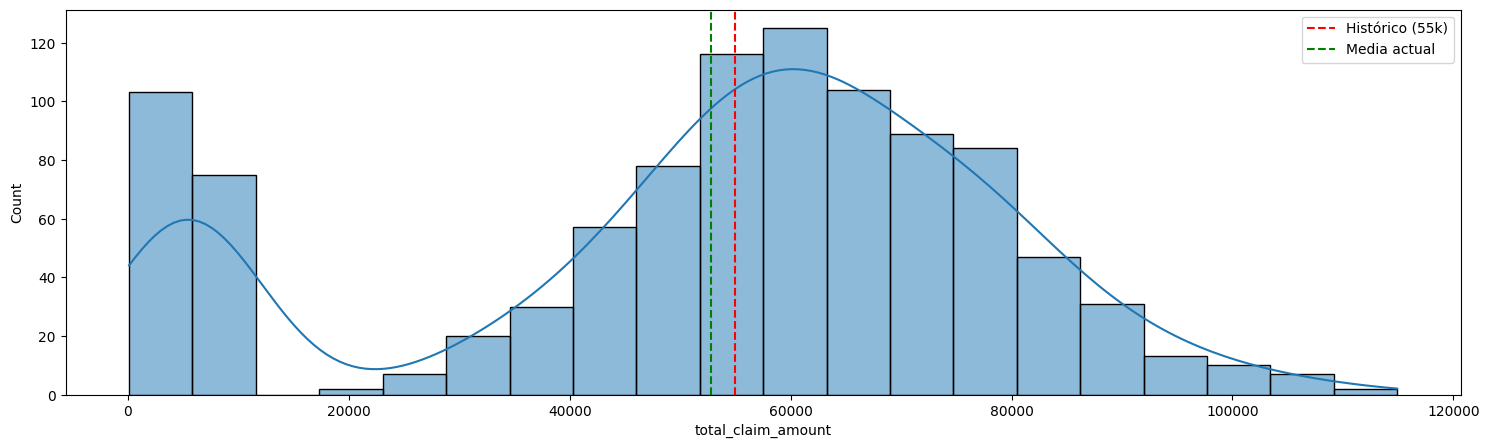

In [11]:
# Gráfico rápido
plt.figure(figsize=(18,5))
sns.histplot(y, kde=True)
plt.axvline(mu_hist, ls="--", color="red", label="Histórico (55k)")
plt.axvline(media, ls="--", color="green",  label="Media actual")
plt.legend()
plt.show()

## Caso 2 · 2 grupos independientes (fraude vs no fraude)

**Pregunta práctica:**  
¿Los siniestros marcados como fraude tienen un coste medio distinto de los siniestros normales?

**Variables usadas:**
- `fraud_reported`: "Y" (fraude reportado) vs "N" (no fraude).
- `total_claim_amount`: importe económico.

**Hipótesis estadísticas:**
- H₀: μ_fraude = μ_no_fraude  
  → el coste medio es el mismo.
- H₁: μ_fraude ≠ μ_no_fraude  
  → el fraude está asociado a distinta severidad económica.

Usamos el test t de Welch (`equal_var=False`) porque no asumimos varianzas iguales entre grupos.

**Qué vamos a mirar:**
1. La media de ambos grupos (Y vs N).
2. El p-value del test.
3. Un boxplot comparando distribuciones / colas largas.


In [15]:
# --- t-test de dos muestras: fraude vs. no fraude ---
fraude = claims.loc[claims["fraud_reported"]== "Y", "total_claim_amount"].dropna()
no_fraude = claims.loc[claims["fraud_reported"]== "N", "total_claim_amount"].dropna()

# prueba t de Welch (no asume varianzas iguales)

t, p = stats.ttest_ind(fraude, no_fraude, equal_var=False)



Media con FRAUDE USD: 60302.10526315789
Media sin FRAUDE USD: 50288.605577689246
t = 6.035779676158822
p-value = 2.9011333511514786e-09


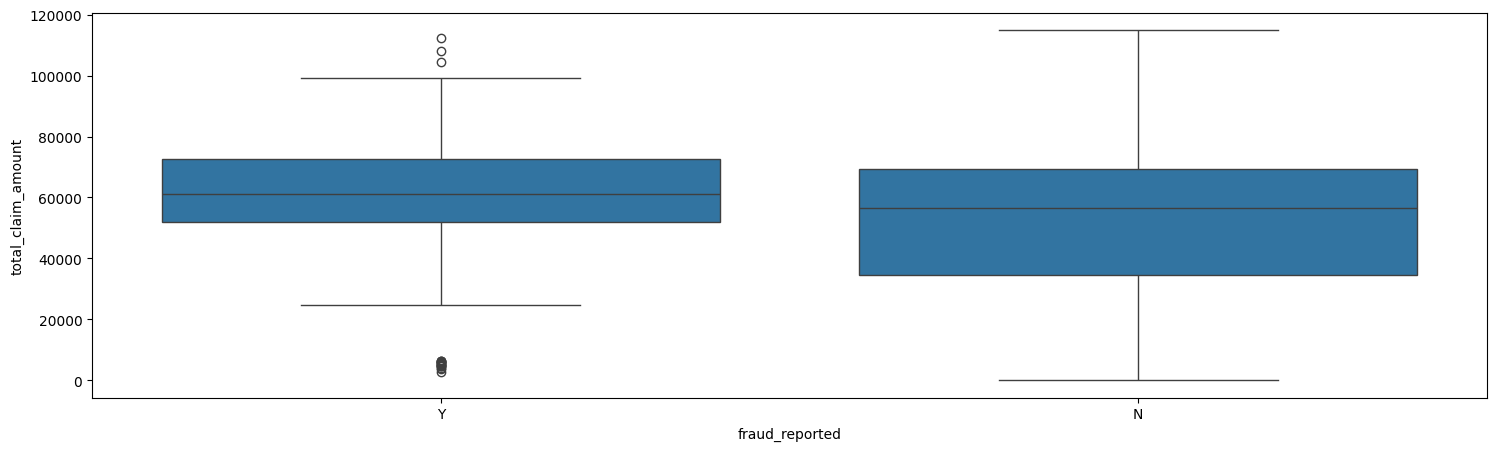

In [19]:
# 3. Resultados básicos
print("Media con FRAUDE USD:", fraude.mean())
print("Media sin FRAUDE USD:", no_fraude.mean())
print("t =", t)
print("p-value =",p)

# 4. Gráfico de comparación
plt.figure(figsize=(18,5))
sns.boxplot(x="fraud_reported", y="total_claim_amount", data=claims)
plt.show()


In [20]:
10000/50289

0.19885064328183102

## Caso 3 · Mismo grupo medido dos veces (t-test pareado)

**Pregunta práctica:**  
¿Estamos estimando bien el coste del siniestro cuando se abre el parte, o sistemáticamente acabamos pagando más de lo que dijimos al inicio?

Esta es una pregunta de reservas: ¿nuestras reservas iniciales están sesgadas?

Ejemplo típico (conceptual, porque este dataset no trae ambas columnas):
- `initial_estimate`: lo que el tramitador reserva inicialmente.
- `final_paid`: lo que finalmente se paga.

**Hipótesis estadísticas:**
- H₀: media(final_paid - initial_estimate) = 0  
  → no hay sesgo sistemático (en promedio acertamos).
- H₁: media(...) ≠ 0  
  → sesgo: o infravaloramos (peligroso) o sobrevaloramos (capital inmovilizado).

**Por qué es crítico actuarialmente:**
- Si estamos subestimando consistentemente, las reservas técnicas están por debajo de lo necesario → riesgo financiero.
- Si estamos sobrestimando siempre, estamos atando capital de manera ineficiente.

En esta celda generamos un ejemplo sintético solo para ilustrar el método y el gráfico.

**Nota:**  
> El dataset `insurance_claims.csv` no contiene información de reservas iniciales ni pagos finales.  
> En este ejemplo se **simulan valores hipotéticos** para ilustrar cómo se aplicaría un **T-test pareado** en la práctica actuarial, comparando estimaciones iniciales vs pagos reales.

In [36]:
np.random.seed(42)

n=200

estimado_inicial = np.random.normal(52000, 8000, n)
pago_final = estimado_inicial + np.random.normal(2000, 5000, n) #el pago final tiende a ser algo mayor que la estimación inicial

t_stat, p_val = stats.ttest_rel(estimado_inicial, pago_final)



In [37]:
p_val

np.float64(4.7729470996322586e-11)

Media estimada inicial: 51673.83227862332
Media pagada final: 54103.1732131177
t = -6.961689223129775
p-value 4.7729470996322586e-11


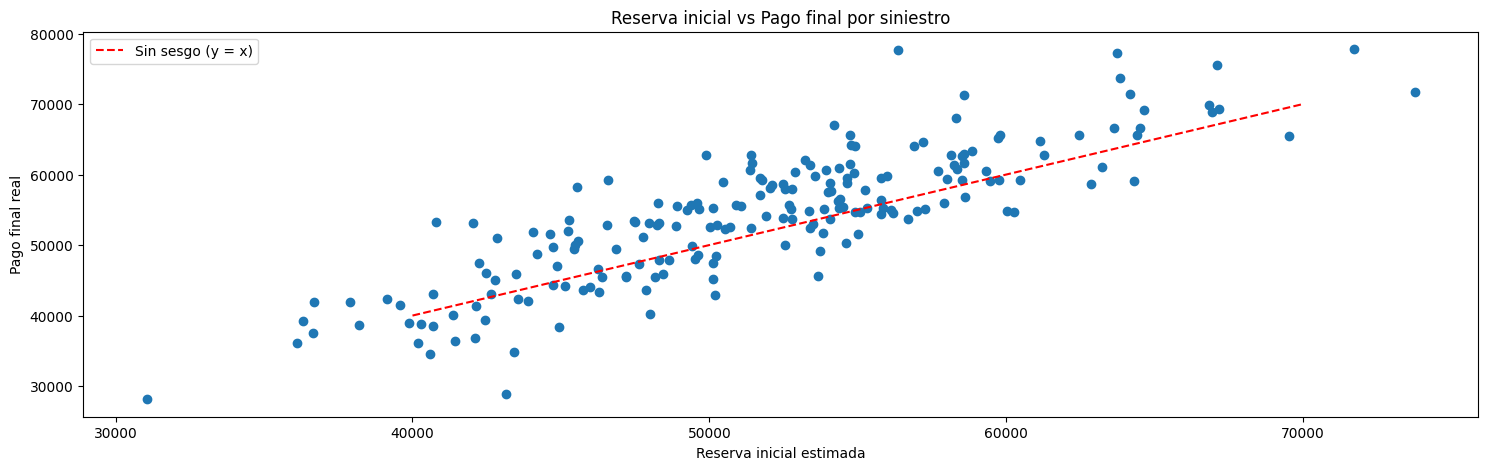

In [38]:
print("Media estimada inicial:", estimado_inicial.mean())
print("Media pagada final:", pago_final.mean())
print("t =", t_stat)
print("p-value", p_val)

# Visual: cada punto es un siniestro, comparo estimación inicial vs pago final
plt.figure(figsize=(18,5))
plt.scatter(estimado_inicial, pago_final)
plt.plot([40000,70000],[40000,70000],'r--', label="Sin sesgo (y = x)")
plt.xlabel("Reserva inicial estimada")
plt.ylabel("Pago final real")
plt.title("Reserva inicial vs Pago final por siniestro")
plt.legend()
plt.show()


## Caso 4 · 3 o más grupos (ANOVA)

**Pregunta práctica:**  
¿Las distintas categorías de severidad del siniestro tienen realmente costes distintos?

Ejemplo real:
- `incident_severity` puede tomar valores tipo "Minor Damage", "Major Damage", "Total Loss", etc.
- `total_claim_amount` es el importe reclamado.

Queremos comprobar si la severidad que asigna el sistema/perito está asociada a diferencias REALES de severidad económica.

**Hipótesis estadísticas:**
- H₀: todas las medias de coste son iguales entre categorías.
- H₁: al menos una categoría tiene una media distinta.

**Interpretación actuarial:**
- Si rechazamos H₀ (p < 0.05), esas etiquetas de severidad no son cosméticas: predicen dinero.
  Eso justifica:
  - circuitos de gestión distintos,
  - más reserva inicial para ciertas severidades,
  - rutas de liquidación más ágiles para daños leves.

También acompañamos con un boxplot para ver qué categoría es la más cara.


In [43]:
# Preparar los grupos por severidad
minor = claims[claims["incident_severity"]=="Minor Damage"]["total_claim_amount"]
major = claims[claims["incident_severity"]=="Major Damage"]["total_claim_amount"]
total = claims[claims["incident_severity"]=="Total Loss"]["total_claim_amount"]
trivial = claims[claims["incident_severity"]=="Trivial Damage"]["total_claim_amount"]

grupos = [minor, major, total, trivial]

F_stat, p_val = stats.f_oneway(*grupos)

In [44]:
F_stat

np.float64(208.1276347966056)

In [45]:
p_val

np.float64(8.680910488995836e-105)

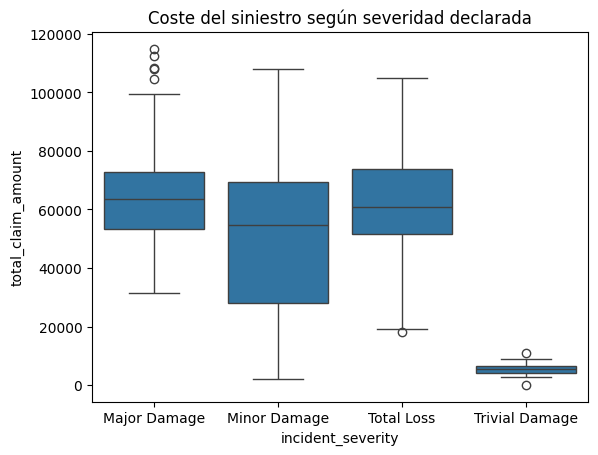

In [46]:
# Visualización: boxplot por severidad declarada
sns.boxplot(
    x="incident_severity",
    y="total_claim_amount",
    data=claims
)
plt.title("Coste del siniestro según severidad declarada")
plt.show()


## Caso 5 · 2 variables numéricas (Correlación de Pearson)

¿Las pólizas con **mayor prima anual** tienden a presentar **siniestros más costosos**?

- Si la **prima anual (`policy_annual_premium`)** refleja adecuadamente el nivel de riesgo del asegurado (tipo de vehículo, cobertura, perfil del conductor, etc.), deberíamos observar que las pólizas con primas más altas también presentan **siniestros más severos (`total_claim_amount`)**.
- Si no hay relación, puede significar que la **tarificación no está capturando correctamente la severidad del riesgo** o que otros factores (como el comportamiento del conductor o la región) influyen más en los costes.

---

### 📊 Hipótesis estadísticas

- **H₀:** ρ = 0 → No existe relación lineal entre la prima y el coste del siniestro.  
- **H₁:** ρ ≠ 0 → Existe una relación lineal significativa.

---

### 📈 Qué vamos a analizar
1. El **coeficiente de correlación de Pearson (r)**, que mide la fuerza y dirección de la relación lineal.  
   - r = 1 → correlación positiva perfecta.  
   - r = -1 → correlación negativa perfecta.  
   - r ≈ 0 → sin relación lineal.
2. El **p-valor**, que nos indica si la correlación observada es estadísticamente significativa (p < 0.05).




In [47]:

x = claims["policy_annual_premium"].dropna()
y = claims["total_claim_amount"].dropna()

r, p = stats.pearsonr(x, y)

print("r =", r)
print("p-value =", p)



r = 0.00909372914952806
p-value = 0.77394752110367


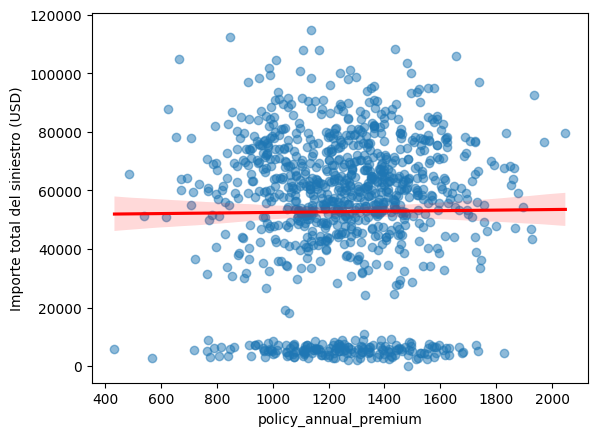

In [48]:
sns.regplot(x=x, y=y, scatter_kws={'alpha': 0.5}, line_kws={'color': 'red'})
plt.ylabel("Importe total del siniestro (USD)")
plt.show()


## Caso 6 · 2 variables categóricas (Chi-cuadrado de independencia)

**Pregunta práctica:**  
¿Ciertos tipos de incidente aparecen sobrerrepresentados entre los casos marcados como fraude?

Variables:
- `incident_type`: tipo de incidente (robo, colisión, daño, etc.).
- `fraud_reported`: "Y"/"N".

**Hipótesis estadísticas:**
- H₀: `incident_type` y `fraud_reported` son independientes.  
  (El tipo de incidente no tiene nada que ver con que se marque fraude.)
- H₁: hay asociación entre ambas variables.  
  (Algunos tipos de incidente concentran más fraude del que esperaríamos por azar.)

Usamos Chi-cuadrado de independencia sobre la tabla de contingencia.
También mostramos un mapa de calor (heatmap) con frecuencias observadas.


In [50]:
tabla = pd.crosstab(claims["incident_type"], claims["fraud_reported"])

# Prueba Chi-cuadrado
chi2, p, dof, expected = stats.chi2_contingency(tabla)

# Resultados
print("Tabla de contingencia:")
print(tabla)
print()
print("Chi² =", chi2)
print("Grados de libertad =", dof)
print("p-value =", p)


Tabla de contingencia:
fraud_reported              N    Y
incident_type                     
Multi-vehicle Collision   305  114
Parked Car                 76    8
Single Vehicle Collision  286  117
Vehicle Theft              86    8

Chi² = 29.131539725752873
Grados de libertad = 3
p-value = 2.1013336774786627e-06


In [49]:
tabla = pd.crosstab(claims["incident_type"], claims["fraud_reported"])
tabla

fraud_reported,N,Y
incident_type,,
Multi-vehicle Collision,305,114
Parked Car,76,8
Single Vehicle Collision,286,117
Vehicle Theft,86,8


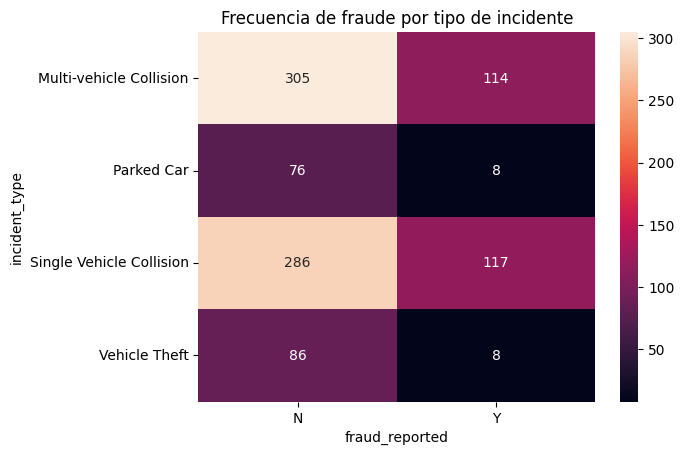

In [51]:

# Gráfico
sns.heatmap(tabla, annot=True, fmt="d")
plt.title("Frecuencia de fraude por tipo de incidente")
plt.show()

sí hay evidencia estadística muy fuerte de que
el tipo de incidente está relacionado con la ocurrencia de fraude.

# Conclusiones globales

- **Caso 1 (1 grupo vs valor histórico):**
  Sirve para decir si el nivel de severidad promedio ha cambiado respecto a lo que la compañía asumía como "normal". Impacta primas y reservas.

- **Caso 2 (2 grupos independientes):**
  Compara fraude vs no fraude. Si hay diferencia significativa en el coste medio, tienes base para priorizar control antifraude.

- **Caso 3 (mismo siniestro en dos momentos):**
  Detecta sesgo sistemático en las reservas iniciales. Es control técnico puro: ¿estamos subestimando o sobreestimando consistentemente?

- **Caso 4 (3+ grupos, ANOVA):**
  Valida si la clasificación de severidad del siniestro tiene sentido económico real. Si sí, justifica circuitos de gestión diferenciados.

- **Caso 5 (2 numéricas, correlación):**
  Te dice si la complejidad física del siniestro explica el importe. Útil para variables explicativas en modelos de severidad.

- **Caso 6 (2 categóricas, chi-cuadrado):**
  Te dice si hay patrones de fraude asociados a ciertos tipos de incidente. Esto es munición directa para equipos antifraude.

